In [ ]:
import os.path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision
import torchvision.transforms as transforms

In [ ]:
classes = [
    'scissors', 'dagger', 'drugs', 'knife', 'scissors', 'airplane', 'bus',
    'train', 'computer pouch', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'truck', 'shoe', 'eye glasses', 'handbag', 'tie', 'bag travel', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'bootle', 'tennis racket', 'key', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'book',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'cell phone', 'drogas',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

In [ ]:
# Carrega o modelo Faster RCNN pré-treinado
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Mostrando a Função do modelo treinado
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Criando a imagem para detecção
img = cv2.imread('/content/mala com drogas.webp')
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
nn_input = transform(img)

In [ ]:
# Criando output do modelo treinado
output = model([nn_input])

In [ ]:
output

[{'boxes': tensor([[472.1477,   4.6325, 518.2848,  28.5044],
          [ 83.8422,   9.1718, 795.3898, 476.1010],
          [ 66.5921,   0.0000, 848.0055, 520.5189],
          [ 39.5525,   9.3217, 814.1612, 554.0000],
          [ 51.1638,   0.0000, 830.4116, 539.9940],
          [137.4209,  13.4406, 708.1166, 477.3807],
          [ 32.5114,   0.0000, 833.5635, 519.0660],
          [ 79.3385,  12.9257, 792.3765, 427.7471],
          [ 76.9342, 447.7653, 809.0491, 536.9502],
          [ 90.6250,  17.3234, 774.3650, 408.5052],
          [ 38.8228,   9.8076, 846.7773, 533.2296],
          [ 57.6096,   0.0000, 842.8163, 523.4211],
          [ 38.7598,  29.7925, 799.4916, 531.1914],
          [251.1582,   4.0017, 743.2066, 261.6117],
          [ 78.2400, 211.4383, 106.6831, 380.9411]], grad_fn=<StackBackward0>),
  'labels': tensor([10, 33,  7,  8, 82,  5, 79, 72, 67, 13, 61,  9,  6, 33, 28]),
  'scores': tensor([0.2993, 0.2671, 0.2119, 0.1637, 0.1427, 0.1170, 0.0682, 0.0678, 0.0636,
         

In [ ]:
# Passa a imagem pelo modelo
image = cv2.imread('/content/Bagagem com droga.jpeg')
# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

In [ ]:
# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

    # Executa o algoritmo Faster RCNN na imagem
    detections = model.predictions(image)

    # Criando os resultados da detecção
    for detection in detections:
        x1, y1, x2, y2 = detection["bounding_box"]
        label = detection["label"]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))

    cv2.imshow("Imagem com detecção de objetos", image)

In [ ]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(), output[0]['labels'].detach().numpy(), output[0]['scores'].detach().numpy()):
  box = [(int(box[0]), int(box[1])), (int(box[2]), int(box[3]))]
  color = colors[box_class]
  class_name = classes[box_class]
  # Anotações na imagem
  cv2.rectangle(img, box[0], box[1], color=color, thickness=2)
  cv2.putText(img=img, text=class_name, org=box[0], fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

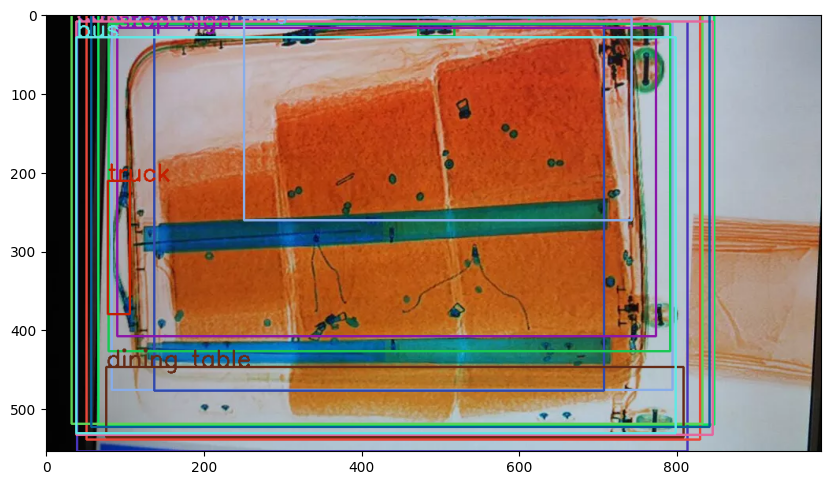

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img = cv2.imread('/content/Bagagem com droga.jpeg')
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(), output[0]['labels'].detach().numpy(), output[0]['scores'].detach().numpy()):
  if score > 0.5:
    box = [(int(box[0]), int(box[1])), (int(box[2]), int(box[3]))]
    color = colors[box_class]
    class_name = classes[box_class]
    # Anotações na imagem
    cv2.rectangle(img, box[0], box[1], color=color, thickness=2)
    cv2.putText(img=img, text=class_name, org=box[0], fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

error: ignored

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import numpy as np
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import precision_score, recall_score, f1_score


model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

def evaluate_detection_model(y_true, y_pred, iou_threshold=0.5):
    """
    Avalia um modelo Faster R-CNN usando métricas de precisão, revocação e F1-score.

    Parâmetros:
    - y_true: Uma lista de Numpy arrays contendo as anotações verdadeiras. Cada array contém as coordenadas (x, y, largura, altura) dos objetos detectados.
    - y_pred: Uma lista de Numpy arrays contendo as previsões do modelo. Cada array contém as coordenadas (x, y, largura, altura) dos objetos detectados.
    - iou_threshold: O limite de IoU (Intersection over Union) para considerar uma detecção correta. O padrão é 0.5.

    Retorna:
    - precisao: A precisão do modelo.
    - revocacao: A revocação do modelo.
    - f1: O F1-score do modelo.
    """
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        true_boxes = y_true[i]
        pred_boxes = y_pred[i]

        if len(true_boxes) == 0 and len(pred_boxes) == 0:
            continue

        if len(pred_boxes) == 0:
            false_negatives += len(true_boxes)
            continue

        if len(true_boxes) == 0:
            false_positives += len(pred_boxes)
            continue

        iou_matrix = np.zeros((len(true_boxes), len(pred_boxes))
        for i in range(len(true_boxes)):
            for j in range(len(pred_boxes)):
                iou = calculate_iou(true_boxes[i], pred_boxes[j])
                iou_matrix[i, j] = iou

        # Encontre correspondências baseadas no IoU
        matched_true = set()
        matched_pred = set()
        for j in range(len(pred_boxes)):
            iou_values = iou_matrix[:, j]
            max_iou = max(iou_values)
            if max_iou >= iou_threshold:
                matched_indices = np.where(iou_values == max_iou)[0]
                for index in matched_indices:
                    if index not in matched_true and j not in matched_pred:
                        matched_true.add(index)
                        matched_pred.add(j)

        true_positives += len(matched_true)
        false_positives += len(pred_boxes) - len(matched_pred)
        false_negatives += len(true_boxes) - len(matched_true)

    precisao = true_positives / (true_positives + false_positives)
    revocacao = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precisao * revocacao) / (precisao + revocacao)

    return precisao, revocacao, f1

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_intersection = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    intersection_area = x_intersection * y_intersection

    area1 = w1 * h1
    area2 = w2 * h2
    union_area = area1 + area2 - intersection_area

    iou = intersection_area / union_area
    return iou

# Exemplo de uso
y_true = [np.array([[50, 50, 100, 100]]), np.array([[30, 30, 80, 80], [200, 200, 50, 50]])]
y_pred = [np.array([[40, 40, 110, 110]]), np.array([[30, 30, 80, 80]])]
precisao, revocacao, f1 = evaluate_detection_model(y_true, y_pred)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-score:", f1)